# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [34]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [19]:
def print_graph(k_arr, score_arr_test, score_arr_train):
    plt.figure(figsize=(13,6))
    plt.plot(k_arr, score_arr_test, marker='o', linestyle='-', color='r', label='тестовая выборка')
    plt.plot(k_arr, score_arr_train, marker='o', linestyle='-', color='g', label='тренировочная выборка')
    plt.xlabel("hyperparametr k")
    plt.ylabel("accuracy, %")
    plt.legend()
    plt.xticks(range(0, 22, 2))
    plt.show()

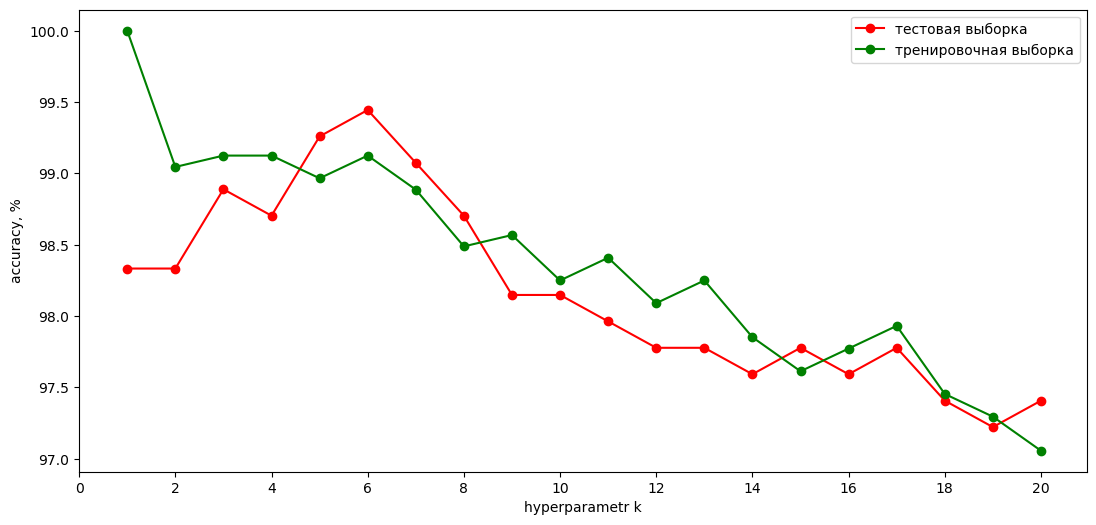

In [36]:
k_arr = [k for k in range(1, 21)]
score_arr_test = []
score_arr_train = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    score_test = accuracy_score(y_test, y_pred_test)
    score_train = accuracy_score(y_train, y_pred_train)
    score_arr_test.append(score_test*100)
    score_arr_train.append(score_train*100)

print_graph(k_arr, score_arr_test, score_arr_train)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** При поиске единственного ближайшего соседа для элемента из тренировочной выборки, kNN, очевидно, найдёт этот же самый элемент, и соспоставит ему правильный класс.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

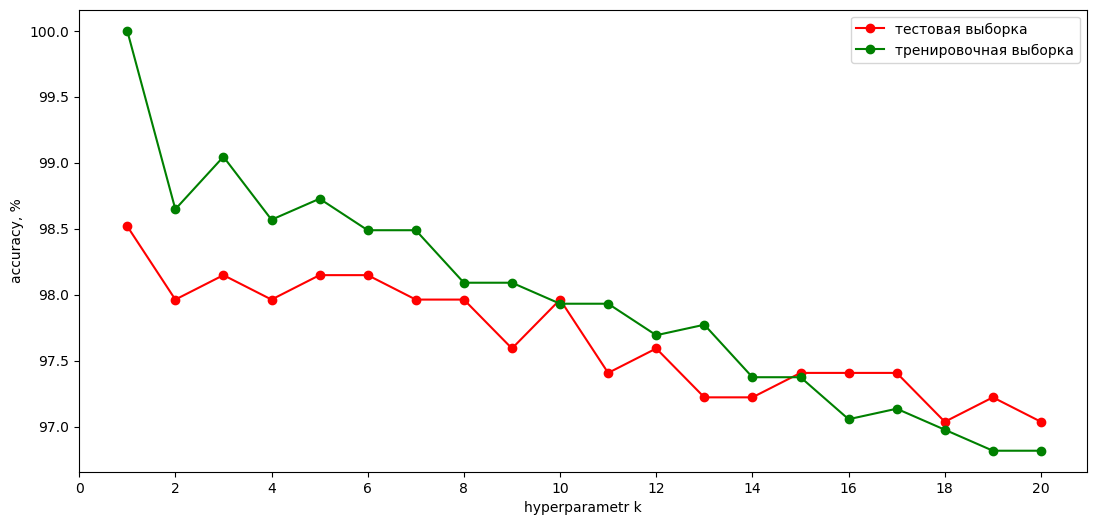

In [37]:
k_arr = [k for k in range(1, 21)]
score_arr_test = []
score_arr_train = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm="kd_tree")
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    score_test = accuracy_score(y_test, y_pred_test)
    score_train = accuracy_score(y_train, y_pred_train)
    score_arr_test.append(score_test*100)
    score_arr_train.append(score_train*100)

print_graph(k_arr, score_arr_test, score_arr_train)

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** смена метрики привела к тому, что модель стала по-другому воспринимать расстояния между объектами, что в свою очередь привелу к изменению предсказаний модели.

**Выводы:** При использовании kNN нужно тестировать несколько различных метрик и выбирать наиболее точную для данной конкретной задачи.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [3]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [4]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [5]:
titanic_cleaned = titanic.dropna(subset=features_columns + [target_column])

# Разделение данных на признаки и целевой признак
X = titanic_cleaned[features_columns]
y = titanic_cleaned[target_column]

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

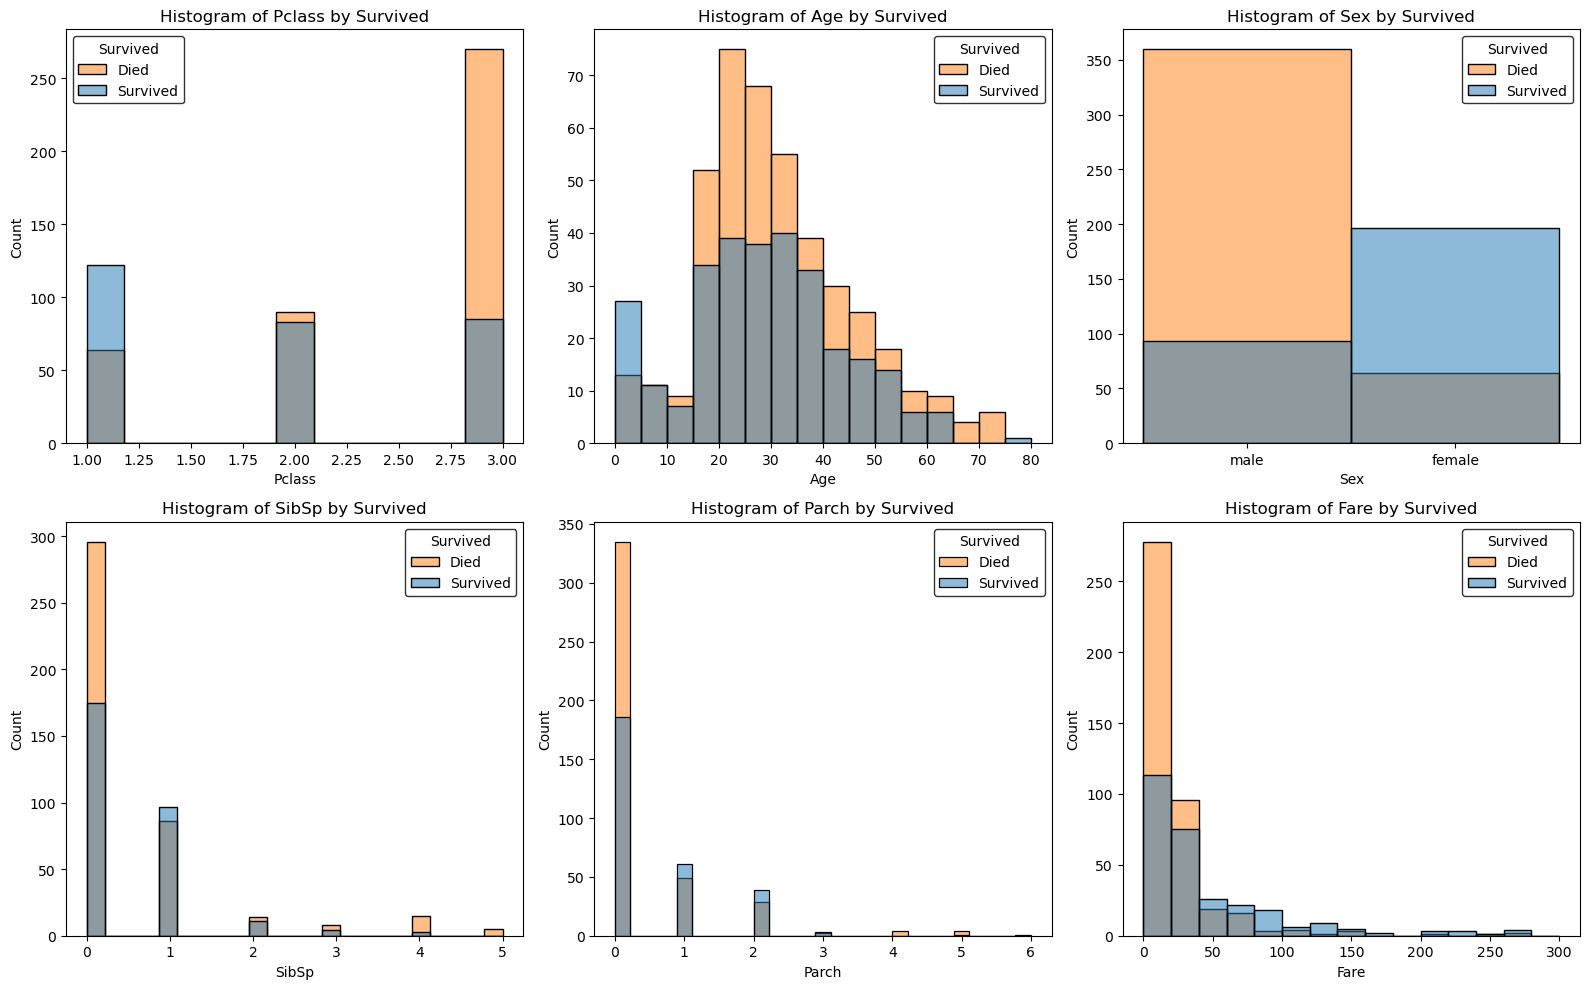

In [7]:
import seaborn as sns

plt.figure(figsize=(16, 10))

# Создаем кастомную цветовую палитру, чтобы цвета не поменялись местами
custom_palette = {1: "tab:blue", 0: "tab:orange"}  # Или другие цвета, если нужно

for i, column in enumerate(features_columns, 1):
    plt.subplot(2, 3, i)
    
    if column == "Age":
        sns.histplot(data=titanic_cleaned, x=column, hue="Survived", kde=False, alpha=0.5, 
                     palette=custom_palette, binwidth=5, binrange=(0, titanic_cleaned['Age'].max()), 
                     hue_order=[1, 0])
    elif column == "Fare":
        sns.histplot(data=titanic_cleaned, x=column, hue="Survived", kde=False, alpha=0.5, 
                     palette=custom_palette, binwidth=20, binrange=(0, 300), 
                     hue_order=[1, 0])
    else:
        sns.histplot(data=titanic_cleaned, x=column, hue="Survived", kde=False, alpha=0.5, 
                     palette=custom_palette, hue_order=[1, 0])  

    plt.title(f"Histogram of {column} by Survived")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Обновляем легенду
    legend = plt.legend(title="Survived", labels=["Died", "Survived"])
    legend.get_frame().set_edgecolor("black")

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

## 🌳 **Дерево решений 1 (Глубина = 1)**  
### **Правило:**  
- Если пассажир **женщина** (`Sex = female`), то **он выжил** (`Survived = 1`).  
- Если пассажир **мужчина** (`Sex = male`), то **он не выжил** (`Survived = 0`).  

### **Обоснование:**  
📊 По гистограмме "Sex" нетрудно заметить что подавляющее большинство женщин выжило, в то время как среди мужчин больше не выживших. 

### **Структура дерева:**  
```plaintext
Sex
├── Female → Survived (1)
└── Male   → Died (0)
```

**Дерево 2:**

## 🌳 **Дерево решений 2 (Глубина = 2)**  
### **Правило:**  
- Если пассажир **женщина** (`Sex = female`), то **он выжил** (`Survived = 1`).  
- Если пассажир **мужчина** (`Sex = male`):  
  - Если **возраст менее 45 лет** (`Age < 45`), то **он выжил** (`Survived = 1`).  
  - Иначе (возраст **45 лет и старше**), то **он не выжил** (`Survived = 0`).  

### **Обоснование:**  
📊 Среди мужчин также есть достаточная часть выживших. Как видно из гистограммы "Age", большая чать из них скорее всего будет сосредоточена среди людей возростом менее 45 лет. Дополним этим предыдущее дерево.

### **Структура дерева:**  
```plaintext
Sex 
├── Female 
|   ├── Pclass = 3 → Died (0) 
|   └── else       → Survived (1)
|
└── Male → Died (0)    
```

Реализуйте полученные деревья по шаблону


In [8]:
def tree1(features: pd.DataFrame) -> pd.Series:

    predicted = pd.Series(index=features.index, dtype=bool)

    for index, row in features.iterrows():
        if row['Sex'] == 'female':
            predicted[index] = True
        else:
            predicted[index] = False

    return predicted


def tree2(features: pd.DataFrame) -> pd.Series:

    predicted = pd.Series(index=features.index, dtype=bool)

    for index, row in features.iterrows():
        if row['Sex'] == 'female':
            if row['Pclass'] == 3: predicted[index] = False
            else: predicted[index] = True
        else:
            predicted[index] = False

    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [9]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    correct_predictions = (predicted == target).sum()
    total_predictions = len(target)

    return correct_predictions / total_predictions

In [10]:
accuracy1 = accuracy(y_train, tree1(X_train))
accuracy2 = accuracy(y_train, tree2(X_train))

print(accuracy1, accuracy2)

0.7915831663326653 0.7955911823647295


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** В связи с дискретностью признаков SibSp и Parch, высока вероятность что элементы будут классифицироваться только по этим признакам, т. к. в N-мерном пространстве элементы будут расположены по прямым, перпендикулярным соответствующим осям признаков, которые, возможно будут достаточно сильно удалены друг от друга по сравнению с другими признаками. Pclass тоже дескретный признак, но, как видно, выживаемость сильно коррелирует с ним, и выборки в каждом из значений достаточно большие.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [11]:
features_columns_new = ['Pclass', 'Age', 'Sex','Fare']

X_train = X_train[features_columns_new]
X_test = X_test[features_columns_new]

X_train['Sex'] = X_train['Sex'].map({'male': 1, 'female': 0})
X_test['Sex'] = X_test['Sex'].map({'male': 1, 'female': 0})

In [12]:
X_test.head()

,Pclass,Age,Sex,Fare
149,2,42.0,1,13.00
407,2,3.0,1,18.75
53,2,29.0,0,26.00
369,1,24.0,0,69.30
818,3,43.0,1,6.45


In [13]:
modelTitanic = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree")
modelTitanic.fit(X_train, y_train)
y_pred_test_Titanic_KNN = modelTitanic.predict(X_test)

accuracyTitanicKNN = accuracy_score(y_test, y_pred_test_Titanic_KNN)
print(accuracyTitanicKNN)

0.6651162790697674


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [14]:
print(X_train.max())
print(X_train.min())

Pclass      3.0
Age        80.0
Sex         1.0
Fare      263.0
dtype: float64
Pclass    1.00
Age       0.67
Sex       0.00
Fare      0.00
dtype: float64


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Это приводит к неравновесности признаков при классификации. Те признаки, по которым диапазон значений больше будут менее значимы, чем те по которым он мал.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Метод очень чувствителен к выбросам. Если одна точка сильно отлична по какому-то признаку от всех отсальных, то после такой нормализации все точки кроме выброса будут расположены очень близко.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [15]:
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()

norm_data = normalization.fit_transform(X_train)
norm_X_train =  pd.DataFrame(norm_data, columns=X_train.columns)

norm_data = normalization.transform(X_test)
norm_X_test =  pd.DataFrame(norm_data, columns=X_test.columns)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [16]:
print(norm_X_test.max())
print(norm_X_test.min())

Pclass    1.00000
Age       0.88655
Sex       1.00000
Fare      1.94802
dtype: float64
Pclass    0.000000
Age      -0.003151
Sex       0.000000
Fare      0.000000
dtype: float64


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [17]:
modelTitanicNorm = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree")
modelTitanicNorm.fit(norm_X_train, y_train)
y_pred_test_Titanic_KNN_norm = modelTitanicNorm.predict(norm_X_test)

accuracyTitanicKNNNorm = accuracy_score(y_test, y_pred_test_Titanic_KNN_norm)
print(accuracyTitanicKNNNorm)

0.7674418604651163


**Вывод:** При классификации методом kNN правильная нормализация данных может привести к достаточно сильному повышению точности модели, например в моём случае она повысилась на 12%.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

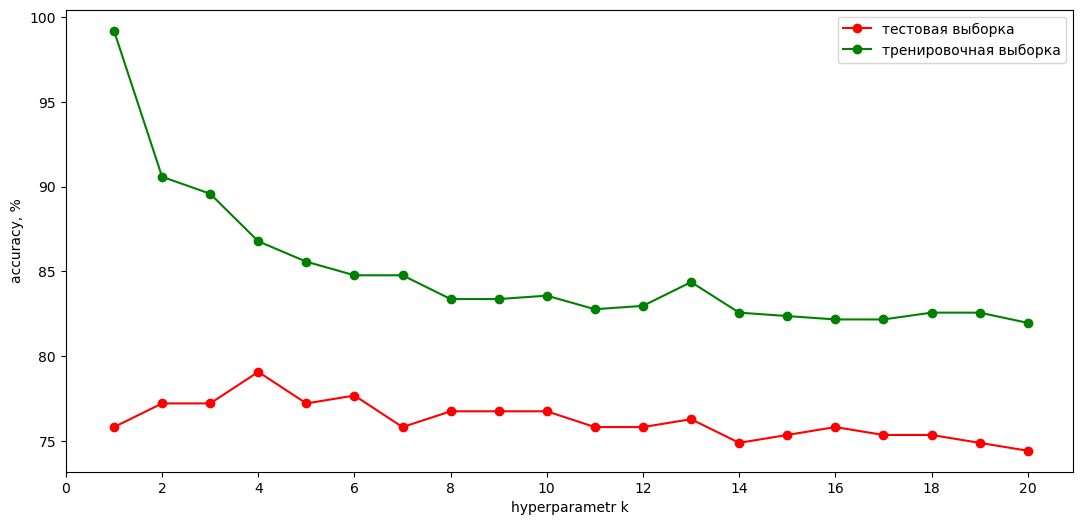

In [20]:
k_arr = [k for k in range(1, 21)]
score_arr_test = []
score_arr_train = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")
    model.fit(norm_X_train, y_train)
    
    y_pred_test = model.predict(norm_X_test)
    y_pred_train = model.predict(norm_X_train)
    score_test = accuracy_score(y_test, y_pred_test)
    score_train = accuracy_score(y_train, y_pred_train)
    score_arr_test.append(score_test*100)
    score_arr_train.append(score_train*100)

print_graph(k_arr, score_arr_test, score_arr_train)

**Вывод:** Даже после нормализации данных и подбора гиперпараметра k, метод kNN по функционалу качества accuracy оказался хуже метода решающего дерева с глубиной 2(!), который к тому же не требуюет больших вычислений для кажого классифицируемого элемента. В связи с чем на мой взгляд kNN не самый удачный метод классификации, по крайней мере в данном случае.